# Making Figures for Proposal

In [4]:
import lsdtopytools as lsd
from functions import *
import geopandas as gpd
import pandas as pd
import seaborn as sns
import rasterio
import rasterio.plot
from osgeo import gdal
import matplotlib.patches as patches
from matplotlib import pyplot as plt
import matplotlib

In [1]:
# NE bounds for quadrangles
pound_ap = (37.125,-82.5)
tazwell_south_vr = (37.125,-81.5)
montvale_br = (37.5,-79.625)
republican_grove_p = (37.000,-79.000)
bounds_list=[pound_ap,tazwell_south_vr,montvale_br,republican_grove_p]
color_list=['g','y','b','r']

In [2]:
ap_df, ap_dem = generate_ksn(north=pound_ap[0],east=pound_ap[1],name='pound_ap.tiff')
vr_df, vr_dem = generate_ksn(north=tazwell_south_vr[0],east=tazwell_south_vr[1],name='tazwell_south_vr.tiff')
br_df, br_dem = generate_ksn(north=montvale_br[0],east=montvale_br[1],name='montvale_br.tiff')
p_df, p_dem = generate_ksn(north=republican_grove_p[0],east=republican_grove_p[1],name='dillwyn_p.tiff')
df_list = [ap_df,vr_df,br_df,p_df]

NameError: name 'generate_ksn' is not defined

In [4]:
ninety_five = lambda df : np.percentile(df.m_chi,95)
ninety_five_dict = dict(zip(['ap','vr','br','p'],[ninety_five(x) for x in [ap_df,vr_df,br_df,p_df]]))
print(ninety_five_dict)

{'ap': 6.052023792266845, 'vr': 6.878838682174681, 'br': 6.528545308113097, 'p': 1.1756012976169585}


In [5]:
q2 = lambda df : df.elevation.describe()['50%']
q2_dict = dict(zip(['ap','vr','br','p'],[q2(x) for x in [ap_df,vr_df,br_df,p_df]]))
print(q2_dict)

{'ap': 548.8818359375, 'vr': 847.3070678710938, 'br': 351.63294982910156, 'p': 146.7986068725586}


In [6]:
dil = rasterio.open('data/dillwyn_p.tiff')

In [7]:
elevation=dil.read(1)[dil.read(1)>=0]
elevation

array([179.08583, 178.70387, 178.17395, ..., 161.1853 , 160.66853,
       159.94907], dtype=float32)

In [8]:
def make_fig1(df_list, _95_dict, q2_dict, color_list, bounds_list, ax):
    n=0
    for ax in ax.flat:
        key = list(_95_dict)[n]
        plot_name = key + 'plot'
        plot_name = sns.histplot(data=df_list[n][df_list[n].m_chi>_95_dict[key]], x='elevation', ax=ax, color=color_list[n], binwidth=10, shrink=0.8)
        total_stream_plot = sns.histplot(data=df_list[n], x='elevation', ax=ax, binwidth=10, color=color_list[n], alpha=0.3, shrink=0.8)
        ax.axvline(x=q2_dict[key], color='k', linestyle=':')
        ax.axvline(x=df_list[n][df_list[n].m_chi>_95_dict[key]].elevation.describe()['50%'], color=color_list[n], linestyle=':')
        n+=1

Text(190, 3500, '(37.0, -79.0)')

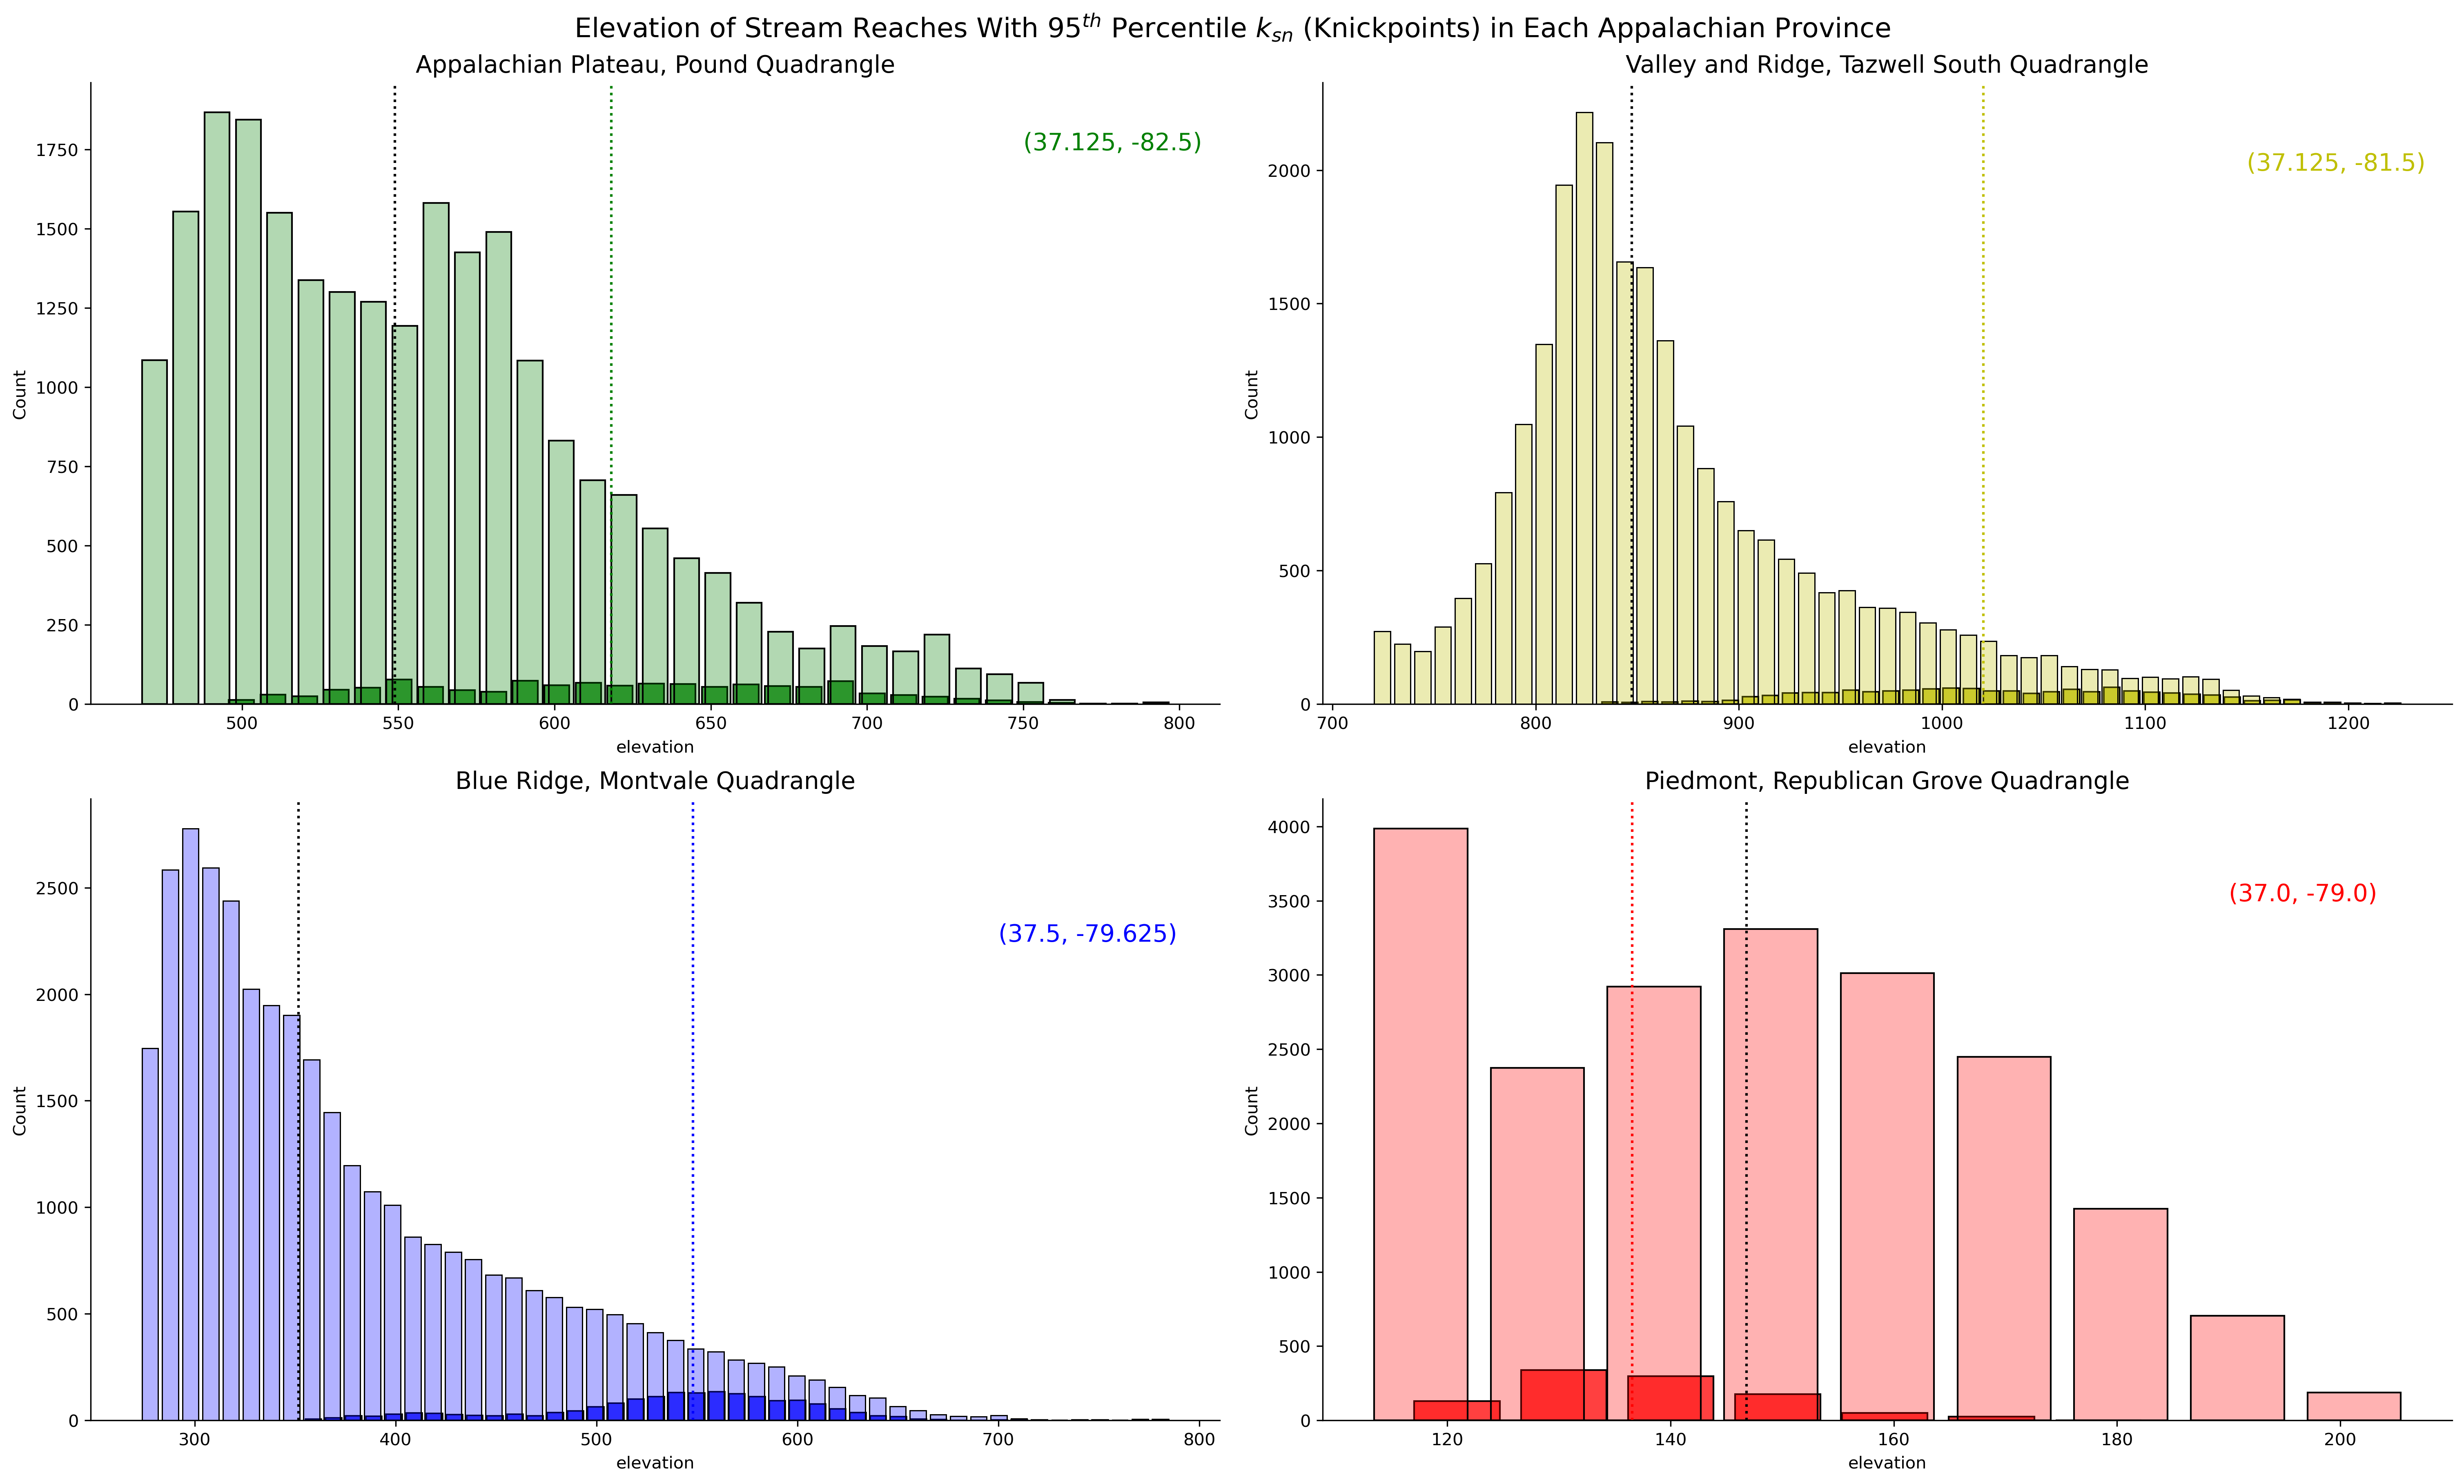

In [9]:
fig, ax = plt.subplots(2,2, figsize=(20,12), dpi=300, constrained_layout=True)
fig.suptitle('Elevation of Stream Reaches With $95^{th}$ Percentile $k_{sn}$ (Knickpoints) in Each Appalachian Province', fontsize=16)
sns.despine()
make_fig1(df_list=df_list, _95_dict=ninety_five_dict, q2_dict=q2_dict, color_list=color_list, bounds_list=bounds_list, ax=ax)
ax[0,0].set_title('Appalachian Plateau, Pound Quadrangle', fontsize=14)
ax[0,1].set_title('Valley and Ridge, Tazwell South Quadrangle', fontsize=14)
ax[1,0].set_title('Blue Ridge, Montvale Quadrangle', fontsize=14)
ax[1,1].set_title('Piedmont, Republican Grove Quadrangle', fontsize=14)
ax[0,0].text(x=750,y=1750,s=pound_ap, fontsize=14,c='g')
ax[0,1].text(x=1150,y=2000,s=tazwell_south_vr, fontsize=14,c='y')
ax[1,0].text(x=700,y=2250,s=montvale_br, fontsize=14,c='b')
ax[1,1].text(x=190,y=3500,s=republican_grove_p, fontsize=14,c='r')

In [3]:
get_topo(pound_ap[0],pound_ap[1], name='pound_ap.tiff')

In [4]:
src = rasterio.open('/sciclone/home/ntlewis/research/working_files/data/pound_ap.tiff')
df, relief = rast_to_df(src)
print(df.head(), '\n',relief.head())

         lon        lat   elevation  x  y
0 -82.624954  37.124954  474.496613  0  0
1 -82.624861  37.124954  475.762756  1  0
2 -82.624768  37.124954  476.947754  2  0
3 -82.624676  37.124954  477.086060  3  0
4 -82.624583  37.124954  476.907104  4  0 
          poly      relief               lat_max               lon_max  \
0  sq_100_100  139.467896   [37.11569441982174]  [-82.61569437385448]   
1  sq_100_200  144.738770  [37.106435160555755]  [-82.61569437385448]   
2  sq_100_300  175.569916   [37.09717590128976]  [-82.61569437385448]   
3  sq_100_400  189.315430   [37.08791664202377]  [-82.61569437385448]   
4  sq_100_500  164.810242   [37.07865738275778]  [-82.61569437385448]   

                lat_min              lon_min      rank  
0   [37.12495367908773]  [-82.6249536331205]  0.112426  
1   [37.11569441982174]  [-82.6249536331205]  0.130178  
2  [37.106435160555755]  [-82.6249536331205]  0.485207  
3   [37.09717590128976]  [-82.6249536331205]  0.633136  
4   [37.08791664202377

poly               sq_1300_1300
relief               213.921265
lat_max    [37.004583308629854]
lon_max    [-82.50458326266221]
lat_min     [37.01384256789584]
lon_min    [-82.51384252192824]
rank                   0.846154
Name: 168, dtype: object


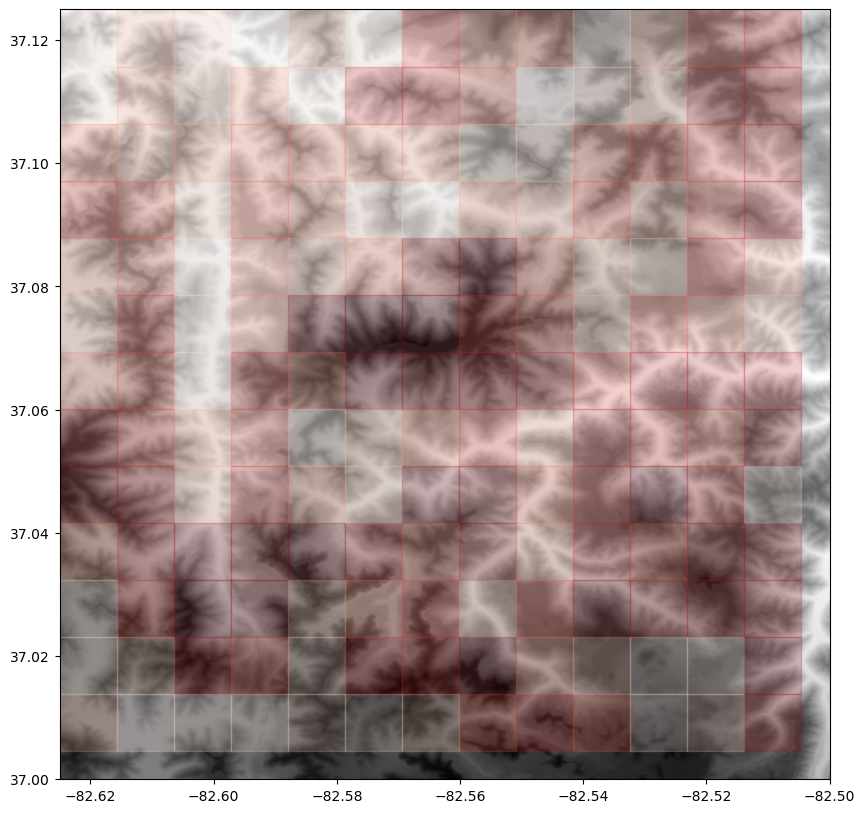

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
basemap = rasterio.plot.show(src, ax=ax, cmap='binary')


cmap = matplotlib.colormaps['Reds']

for i in range(len(relief)):
   arr = relief.loc[i]
   ax.add_patch(
      patches.Rectangle(
         (arr['lon_min'], arr['lat_max']),
         np.abs(arr['lon_min']-arr['lon_max']),
         np.abs(arr['lat_max']-arr['lat_min']),
         color = cmap(arr['rank']),
         fill=True,
         alpha=0.2
     ))
print(arr)